# Lecture 4 - Cross-Validation & Performance Measures for Regression Tasks

From the last period, we introduce one strategy to avoid overfitting: regularization. 

<div class="alert alert-info">
    <b>Regularization</b> 

Regularization constrains (or regularizes) the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, as to avoid the risk of overfitting.
</div>

But there other strategies to apply in order to mitigate overfitting:

## Ways to Avoid Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Regularization - constrains/regularizes the coefficients of the model

4. Cross-validation - technique for utilizing the training data to fine-tune hyperparameter values

In this lecture, we will introduce **cross-validation**. Recall the implementation for the regularized polynomial regression model:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

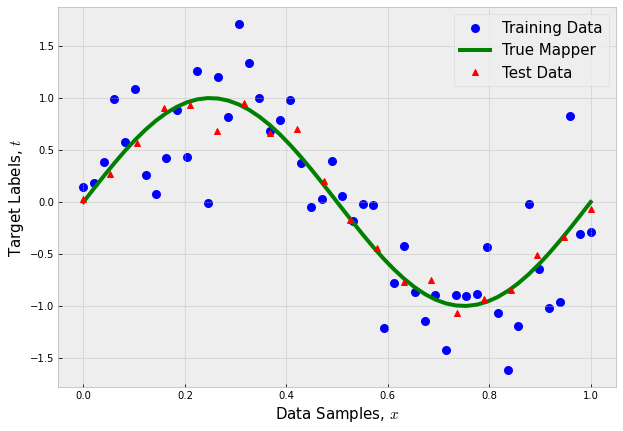

In [3]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [4]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    # Compute feature matrix X with polynomial features
    X = np.array([x**m for m in range(M+1)]).T #computes the phi(x) = [x^0, x^1, ...., x^M]
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X)@X.T@t # Optimal set of parameters w
    # Compute model prediction
    y = X@w
    return w, y

def PolynomialRegression_reg(x,t,M,lam):
    # Compute feature matrix X with polynomial features
    X = np.array([x**m for m in range(M+1)]).T
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t
    # Compute model prediction
    y = X@w
    return w, y

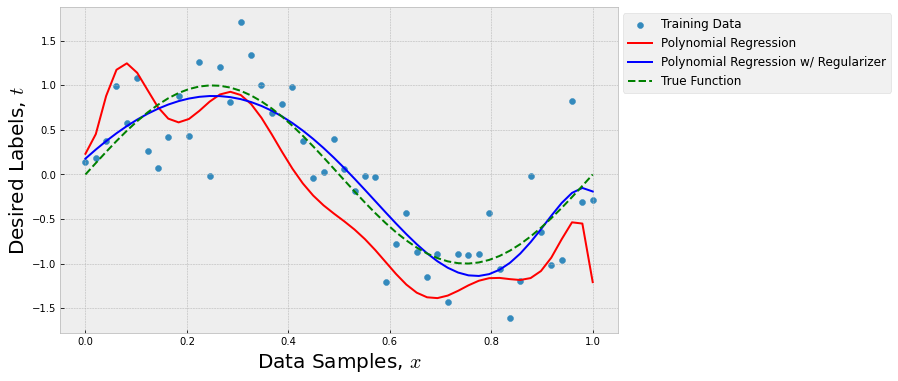

In [5]:
M = 20
lam = 0.001

w, y, = PolynomialRegression(x_train,t_train,M) 
wreg, yreg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,6))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y,'r', label = 'Polynomial Regression')
plt.plot(x_train,yreg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

In [6]:
def PolynomialRegression_test(x,M,w):
    # Feature matrix for test set
    X = np.array([x**m for m in range(M+1)]).T
    
    # Prediction for test set
    y = X@w
    
    return y

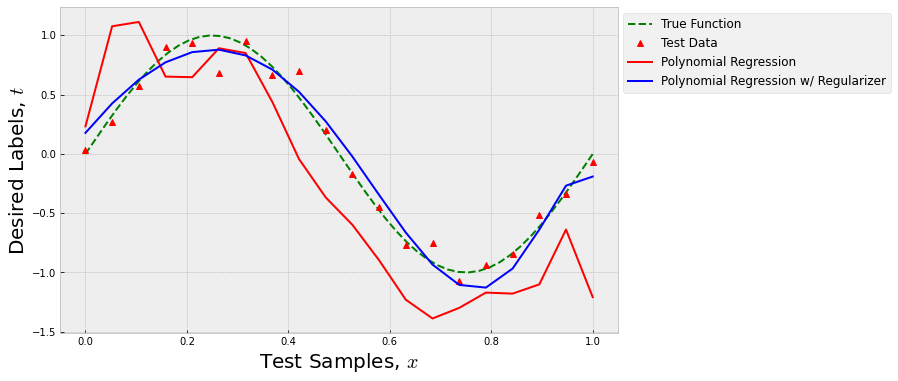

In [7]:
# Prediction for test set using non-regularized model
y_test = PolynomialRegression_test(x_test, M, w)

# Prediction for test set using regularized model
y_test_reg = PolynomialRegression_test(x_test, M, wreg)

# Plotting
fig=plt.figure(figsize=(10,6))
plt.plot(x_true, t_true, '--g', label = 'True Function')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.plot(x_test,y_test,'r', label = 'Polynomial Regression')
plt.plot(x_test,y_test_reg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Test Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

### Fine-tuning the Hyperparameters

The hyperparameters of ridge regression are the model order $M$ and the regularizer coefficient $\lambda$.

How would you choose which value to use? -- Cross-validation.

---

# Cross-Validation

The goal of **cross-validation**, or CV, is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

Cross-validation allows us to determine the values for the hyperparameter that provide the most **generalization**. Cross-validation mitigates the occurrrence of overfitting, but it does not eliminate it entirely.

* Reading: [Sections 19.1-19.6](https://ufl.instructure.com/courses/455013/external_tools/412362?display=borderless) from the Alpaydin textbook and [Section 5.3 Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the "Python Data Science Handbook" textbook.

---

# Performance Measures

In order to determine if the model is able to **generalize** to a **validation set**, we need to determine a **performance measure**.

Which _quantitative_ measure would you use to compare model performances?

## Error Measures

Error measures are always a good start for **regression** tasks. Some examples include:

* **Mean Squared Error (MSE)** - best when the data does not have outliers. The MSE will penalize outliers heavily.

* **Mean Absolute Error (MAE)** - best when you suspect data has outliers.

In [8]:
# Residual error for Training data for polynomial regression without and with regularizer
error_train = t_train - y 
error_train_reg = t_train - yreg 

# Residual error for Test data for polynomial regression without and with regularizer
error_test = t_test - y_test
error_test_reg = t_test - y_test_reg

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(error_train**2))
print('With regularizer: ', np.mean(error_train_reg**2),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(error_test**2))
print('With regularizer: ', np.mean(error_test_reg**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(np.abs(error_train)))
print('With regularizer: ', np.mean(np.abs(error_train_reg)),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(np.abs(error_test)))
print('With regularizer: ', np.mean(np.abs(error_test_reg)),'\n')

Mean Squared Error 

Training Set
Without regularizer:  0.29792223579619714
With regularizer:  0.17250129270892742 

Test Set
Without regularizer:  0.25366853240217496
With regularizer:  0.01635964741238769 

----------------------------------------------------------------
Mean Absolute Error 

Training Set
Without regularizer:  0.4573204349041253
With regularizer:  0.32355354825582977 

Test Set
Without regularizer:  0.4373919829051828
With regularizer:  0.11852427606918056 



Other error-based measures can be considered, e.g., normalized mean squared error (NMSE), normalized mean absolute error (NMAE), etc.

## Q-Q Plot

We can also use the **Quantile-Quantile (Q-Q)** plot to assess qualitative measures of goodness-of-fit.

* The Q-Q plot help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential, or if two sets of samples were drawn from the same distribution. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It's just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

* What are *quantiles*? These are often referred to as *percentiles*. These are points in your data below which a certain proportion of your data fall which are captured in the Cumulative Distribution Function (CDF) of a random variable. For example, imagine the classic bell-curve standard Normal distribution with a mean of 0. The 0.5 quantile, or 50th percentile, is 0. Half the data lie below 0. That's the peak of the hump in the curve. The 0.95 quantile, or 95th percentile, is about 1.64. 95 percent of the data lie below 1.64.

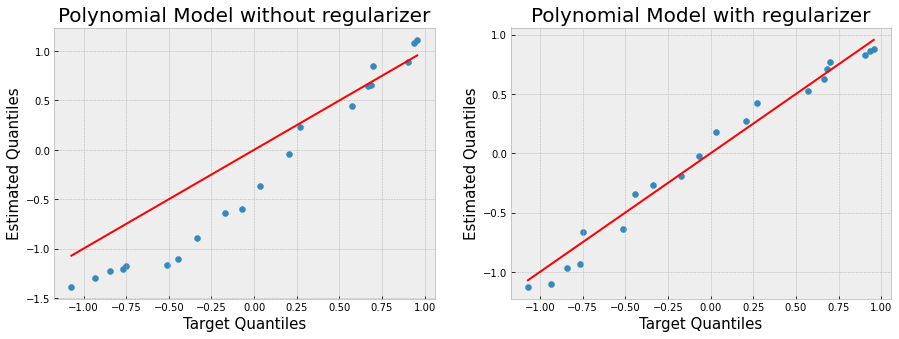

In [9]:
base = np.linspace(min(t_test),max(t_test),100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.scatter(np.sort(t_test), np.sort(y_test))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base,base,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model without regularizer',size=20)

plt.subplot(1,2,2); plt.scatter(np.sort(t_test), np.sort(y_test_reg))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base,base,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model with regularizer',size=20);

And then take a summative **quantitative** measure, namely the **coefficient of determination**.

In [10]:
import scipy.stats as stats

print('Polynomial Regression Without Regularization - Test Set')
m, b, r, p, _ = stats.linregress(np.sort(t_test), np.sort(y_test))
print('Coefficient of Determination: ',r**2)
print('Slope: ',m)
print('Intercept: ',b)
print('p-value: ', p)
print('-------------------')
print('Polynomial Regression With Regularization - Test Set')
m, b, r, p, _ = stats.linregress(np.sort(t_test), np.sort(y_test_reg))
print('Coefficient of Determination: ',r**2)
print('Slope: ',m)
print('Intercept: ',b)
print('p-value: ', p)

Polynomial Regression Without Regularization - Test Set
Coefficient of Determination:  0.9687865960146783
Slope:  1.313944524817891
Intercept:  -0.2622612826647828
p-value:  5.290954634463151e-15
-------------------
Polynomial Regression With Regularization - Test Set
Coefficient of Determination:  0.9809746301559755
Slope:  1.0289082089712718
Intercept:  -0.010154496165762802
p-value:  6.109756184062297e-17


For most applications, we want a model with a coefficient of determination $r^2\geq99\%$.

In this example, the exponential performs better than the polynomial model in the test set.

## Other Performance Measures

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---

# Experimental Design

<div class="alert alert-info">
    <b>Experimental Design - How to use your data without cheating</b> 

In experimental design we need data to train (learn) models, and to test how good the models are. The training data needs to be different (disjoint) from the test data. Otherwise we would be testing the learned model on data it had previously seen, and we would get a biased estimate of the model's generalized performance.
    
Most machine learning algorithms require choosing parameter values (**hyperparemeters**); very often this is done by setting aside some of the training data to evaluate the quality of different parameter settings.
</div>

## Factors, Response, and Strategy of Experimentation

As in other branches of science and engineering, in machine learning too, we do experiments to get information about the process under scrutiny.

Our goal is to plan and conduct machine learning experiments and analyze the data resulting from the experiments, to be able to eliminate the effect of chance and obtain conclusions which we can consider *statistically significant*.

The output of a trained learning system depends on:
* **Controllable parameters:** hyperparameters/settings of the algorithm/algorithm design choices

* **Uncontrollable parameters:** noise in data, any randomness in the training data

### Strategies of Experimentation - Fine-Tuning Hyperparameters

To fully test a system, you want to try to evaluate each of these parameters separately. However, this is often not easily done.

A few strategies for fine-tuning hyperparameters include:

* Best guess
* One factor at a time
* Factorial design or **grid search**
* Randomized search

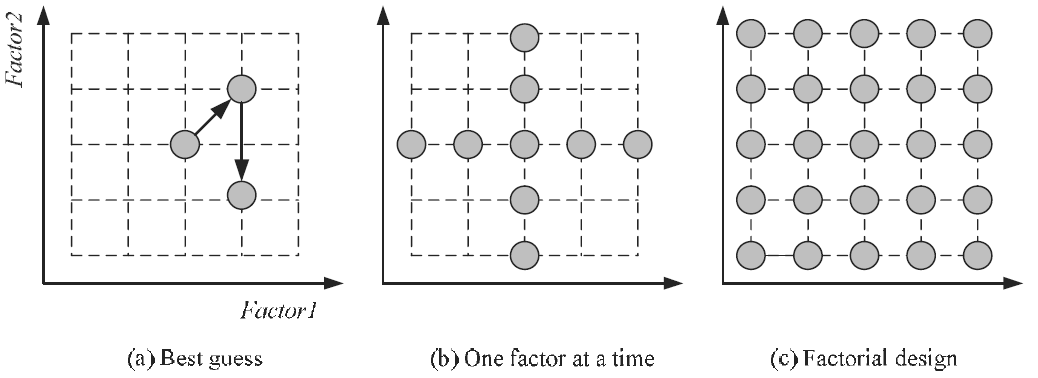

In [1]:
from IPython.display import Image
Image('figures/Experimentation.png',width=800)
# Source: Alpaydin, E. (2014) Introduction to Machine Learning. 3rd edition, MIT Press.

The ideal strategy of experimentation is **grid search**. But this would be very tedious work, and you may not have time to explore many combinations. Instead, you can make use of standard library functions to implement grid search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using **cross-validation**.

The grid search approach is fine when you are exploring relatively few combinations, but when the hyperparameter search space is large, it is often preferable to use randomized search. In **randomized search** library functions, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits: if you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter, instead of just a few values per hyperparameter with the grid search approach; and you have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

Another way to fine-tune your system is to try to combine the models that perform best. The group (or "ensemble") will often perform better than the best individual model, especially if the individual models make very different types of errors.

You will often gain good insights on the problem by inspecting the best models. You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem by, for example, adding extra features or, on the contrary, getting rid of uninformative ones, cleaning up outliers, or other solutions.

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your pipeline to transform the test data and evaluate the final trained model on the test set. The performance will usually be slightly worse than what you measured using cross-validation if you did a lot of hyperparameter tuning (because your system ends up fine-tuned to perform well on the validation data and will likely not perform as well on unknown datasets). It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data.

### Principles of Experimental Design: Randomization, Replication, and Blocking

* **Randomization:** requires that the order in which the runs are carried out should be randomly determined so that the results are independent. For example, machines require some time to warm up until they operate in their normal range so tests should be done in random order for time not to bias the results.

* **Replication:** for the same configuration of (controllable) factors, the experiment should be run a number of times to average over the effect of uncontrollable factors and induced randomization. In machine learning, this is typically done by running the same algorithm on a number of resampled versions of the same dataset; this is done with **cross-validation**.

* **Blocking:** is used to reduce or eliminate the variability due to nuisance factors that influence the response but in which we are not interested. For example, defects produced in a factory may also depend on the different batches of raw material, and this effect should be isolated from the controllable factors in the factory, such as the equipment, personnel, and so on. In ML experimentation, when we use resampling and use different subsets of the data for different replicates, we need to make sure that for example if we are comparing learning algorithms, they should all use the same set of resampled subsets.

<div class="alert alert-info">
    <b>No Free Lunch Theorem</b> 

The No Free Lunch Theorem states that there is no single learning algorithm that in any domain always induces the most accurate learner. The usual approach is to try many and choose the one that performs the best on a separate validation set.
    
For any learning algorithm, there is a dataset where it is very accurate and another dataset where it is very poor. When we say that a learning algorithm is good, we only quantify how well its inductive bias matches the properties of the data.
</div>

---

# Coming back to Cross-Validation

Let's consider the **MSE** as our performance measure. There are different strategies for implementing cross-validation:

1. k-fold cross-validation
2. Leave-One-Out cross-validation
3. Stratified cross-validation
4. $k\times 2$ cross-validation

We also need to make sure that classes are represented in the right proportions when subsets of data are held out, not to disturb the class prior probabilities; this is called **stratiﬁcation**. If a class has 20 percent examples in the whole dataset, in all samples drawn from the dataset, it should also have approximately 20 percent examples.

---

## $1\times 2$ cross-validation

Let's consider the case, where we only have a single validation set which resulted from splitting the training data into a training set and a validation set with splitting rations 70% and 30% respectively.

In [11]:
from sklearn.model_selection import train_test_split

x_train2, x_validation, t_train2, t_validation = train_test_split(x_train, t_train, test_size=0.3)

x_train2.shape, x_validation.shape, t_train2.shape, t_validation.shape

((35,), (15,), (35,), (15,))

Let's now vary the values for $M$ and estimate the associated coefficients $\mathbf{w}$ using the training set. Then, let's evaluate performance measure (e.g. MSE) in both training and validation sets:

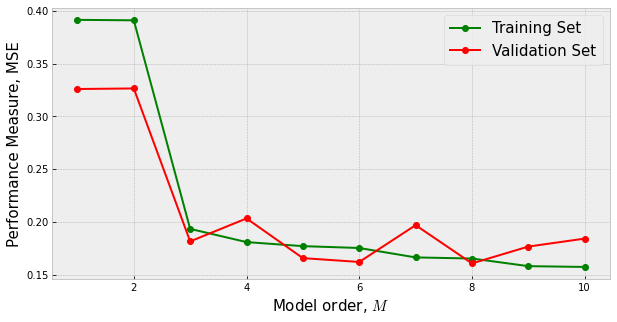

In [12]:
M_vals = range(1,11)

MSE_train = []
MSE_val = []
for M in M_vals:
    
    # Train the model (without regularization for simplicity of illustration)
    w, y = PolynomialRegression(x_train2, t_train2, M)
    
    # Make predictions for the training and validation sets
    y_train = PolynomialRegression_test(x_train2, M, w)
    y_val = PolynomialRegression_test(x_validation, M, w)
    
    # Performance Measure
    MSE_train += [np.mean((t_train2-y_train)**2)]
    MSE_val   += [np.mean((t_validation-y_val)**2)]

# Plotting results
plt.figure(figsize=(10,5))
plt.plot(M_vals, MSE_train, '-og',label='Training Set')
plt.plot(M_vals, MSE_val, '-or',label='Validation Set')
plt.legend(fontsize=15)
plt.xlabel('Model order, $M$', size=15)
plt.ylabel('Performance Measure, MSE', size=15);

* Which model order would you choose? Why?

The phenomenon we observe here is known as the **bias-variance trade-off** (more next lecture).

---

## K-Fold Cross-Validation

The technique of k-fold cross-validation, illustrated below for the case of $k=4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the runs are then averaged.

$K$ is typically 10 or 30. As $K$ increases, the percentage of training instances increases and we get more robust estimators, but the validation set becomes smaller. Furthermore, there is the cost of training the classiﬁer $K$ times, which increases as $K$ is increased. As $N$ increases, $K$ can be smaller; if $N$ is small, $K$ should be large to allow large enough training sets.

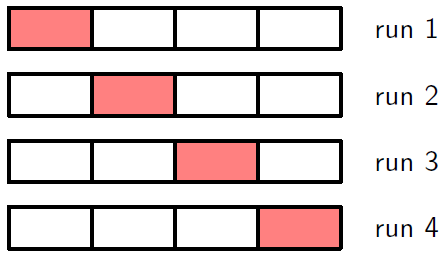

In [2]:
Image('figures/Kfold CV.png',width=400)

#### Discussion

* We select the set of hyperparameters $\{M,\lambda\}$ with the best performance score (e.g. smallest MSE or largest $r^2$).

* If the value of the hyperparameter falls at the edge of provided range of values, it is appropriate to expand the range of values for further exploration.

* Other performance measures can be used, for example, the coefficient of determination of the Q-Q plot for regression tasks, or accuracy score for classification tasks.

---

## Leave-One-Out Cross-Validation

One extreme case of cross-validation is the **leave-one-out** where given a dataset of $N$ instances, only one instance is left out as the validation set (instance) and training uses the $N − 1$ instances. We then get $N$ separate pairs by leaving out a different instance at each iteration. This is typically used in applications such as medical diagnosis, where labeled data is hard to ﬁnd. Leave-one-out **does not permit stratiﬁcation**.

---